## Reactive Covariance - Project in Python 

### I - Leverage Effect (Paper 1) 


#### 1.1 - With an Index

In [1]:
# Import relevant libraries

import matplotlib.pyplot as plt
import pandas as pd
import os


In [ ]:
# Create a Dictionnary with the name of the stocks that we want to plot 


In [2]:
# Import the data 

df = pd.read_csv(os.path.join('Data\ETFs','voo.us.txt'),delimiter=',',usecols=['Date','Open','High','Low','Close']) # This is an S&P 500 ETF
df = df.sort_values("Date") # sort the data by date

df.head()

,Date,Open,High,Low,Close
0,2010-09-14,89.832,90.390,89.430,90.006
1,2010-09-15,89.640,90.304,89.447,90.233
2,2010-09-16,89.988,90.251,89.710,90.197
3,2010-09-17,90.740,90.740,89.988,90.286
4,2010-09-20,90.618,91.753,90.374,91.753


In [3]:
# This function computes the price change at t + tau (delta x(t+tau)) 

def delta_t_tau(tau):
    return (df["Close"].shift(-tau) - df["Close"].shift(-tau+1))/df["Close"].shift(-tau+1)


In [4]:
# This function computes Z

def Z_hat(tau,T):
    
    df["Interm_Z"] = (delta_t_tau(tau)**2)  # computes the core of the sum 
    
    return ((1/T)*(df["Interm_Z"].sum())**2) # returns the sum squared normalized by T

In [5]:
# This function computes the Leverage L 

def L_hat(tau,T):
    
    df["Interm_Prod_Delta"]  = (delta_t_tau(tau))**2*delta_t_tau(0)
    
    return ((1/(Z_hat(tau,T)*(T-tau)))*df["Interm_Prod_Delta"].sum())


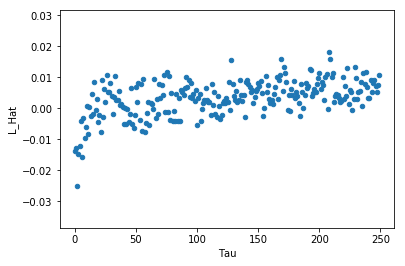

In [6]:
# We look tau steps ahead in the future

# The available time horizon in our sample is T 

T = df.shape[0] # size of our sample

result_df = pd.DataFrame([])

for tau in range(0,250): ## specify the max range here 
 
    result_df = result_df.append(pd.DataFrame({"Tau":tau,'L_Hat': L_hat(tau,T)}, index=[0]), ignore_index=True)

result_df.plot.scatter(x = "Tau", y = "L_Hat" )

In [7]:
result_df.head(10)

,Tau,L_Hat
0,0,-0.013707
1,1,-0.012863
2,2,-0.025084
3,3,-0.014730
4,4,-0.012041
5,5,-0.004083
6,6,-0.015553
7,7,-0.003220
8,8,-0.009537
9,9,-0.006189
